In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Public Transportation Transaction Transjakarta**

## **Latar Belakang**
PT.Transjakarta merupakan sebuah perusahan yang bergerak di bidang transportasi yang sudah berdiri sejak 2004 yang terintegrasi dengan sistem jaklingko. PT.Tranjakarta memiliki beberapa jenis armada yaitu Regular transjakarta, Mikrotrans dan royal trans. Dilakukan pengolahan data diharapkan untuk mendapatkan output yaitu berupa kualitas pelayanan dan pertumbuhan pengguna Transjakarta

## **Pernyataan Masalah**
Perusahaan ingin mengetahui kapan terjadinya jam sibuk untuk mengetahui demografi penumpang dan juga paling sering digunakan. Untuk mengevaluasi strategi yang dapat difokuskan pada demografi, lokasi , bank, waktu tertentu.

Dari penyataan tersebut ada beberapa pertanyaan yang bisa diutarakan:
1. berapa banyak penumpang yang menggunakan transjakarta berdasarkaan tipe?
2. dimana lokasi koridor teramai pada waktu jam sibuk

## **Data Cleaning**
1. mengisi missing value
2. mengubah tipe data
3. check duplicate

In [269]:
df=pd.read_csv('Transjakarta (5).csv')
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [270]:
df.shape

(37900, 22)

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [272]:
df.duplicated().sum()

0

In [273]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [274]:
# mengisi missing value pada payAmount
def fill_pay_amount(row):
    if row['corridorID'] in ['1K', '1T', '6P', 'B13', 'B14', 'D31', 'D32', 'S12', 'S31', 'T21']:
        return 20000
    elif row['corridorID'] in ['10A', '10B', '11B', '11C', '11K', '11M', '11N', '11P', '12C', '12F', '2E', '2F', '2H', '3A', '3B', '3C', '4E', '9F', 'BW9', 'JAK']:
        return 0
    else:
        return 3500

# Mengisi nilai
df['payAmount'] = df.apply(lambda row: fill_pay_amount(row) if pd.isna(row['payAmount']) else row['payAmount'], axis=1)

In [275]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
dtype: int64

In [276]:
# corridorID
mapping = df.dropna(subset=['corridorID']).drop_duplicates('corridorName').set_index('corridorName')['corridorID'].to_dict()
def fill_missing_id(row):
    if pd.isna(row['corridorID']) and row['corridorName'] in mapping:
        return mapping[row['corridorName']]
    else:
        return row['corridorID']
df['corridorID'] = df.apply(fill_missing_id, axis=1)
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [277]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
dtype: int64

In [278]:
# corridorName
mapping = df.dropna(subset=['corridorName']).drop_duplicates('corridorID').set_index('corridorID')['corridorName'].to_dict()
def fill_missing_id(row):
    if pd.isna(row['corridorName']) and row['corridorID'] in mapping:
        return mapping[row['corridorID']]
    else:
        return row['corridorName']
df['corridorName'] = df.apply(fill_missing_id, axis=1)
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [279]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
dtype: int64

In [280]:
# tapInStops
mapping = df.dropna(subset=['tapInStops']).drop_duplicates('tapInStopsName').set_index('tapInStopsName')['tapInStops'].to_dict()
def fill_missing_id(row):
    if pd.isna(row['tapInStops']) and row['tapInStopsName'] in mapping:
        return mapping[row['tapInStopsName']]
    else:
        return row['tapInStops']
df['tapInStops'] = df.apply(fill_missing_id, axis=1)
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [281]:
df.shape

(37900, 22)

In [282]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
dtype: int64

In [283]:
# tapOutStops
mapping = df.dropna(subset=['tapOutStops']).drop_duplicates('tapOutStopsName').set_index('tapOutStopsName')['tapOutStops'].to_dict()
def fill_missing_id(row):
    if pd.isna(row['tapOutStops']) and row['tapOutStopsName'] in mapping:
        return mapping[row['tapOutStopsName']]
    else:
        return row['tapOutStops']
df['tapOutStops'] = df.apply(fill_missing_id, axis=1)
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


In [284]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops            34
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         1363
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount              0
dtype: int64

In [285]:
# menghapus missing value 5 variabel
var = ['tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'tapOutTime']
df = df.dropna(subset=var, how='all')

In [286]:
df.isna().sum()

transID              0
payCardID            0
payCardBank          0
payCardName          0
payCardSex           0
payCardBirthDate     0
corridorID           0
corridorName         0
direction            0
tapInStops          32
tapInStopsName       0
tapInStopsLat        0
tapInStopsLon        0
stopStartSeq         0
tapInTime            0
tapOutStops         19
tapOutStopsName      0
tapOutStopsLat       0
tapOutStopsLon       0
stopEndSeq           0
tapOutTime           0
payAmount            0
dtype: int64

In [287]:
# menghapus missing value tersisa
df = df.dropna(subset=['tapInStops', 'tapOutStops'])

In [288]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

In [289]:
df.shape

(36506, 22)

**Mengubah Tipe Data**

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36506 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           36506 non-null  object 
 1   payCardID         36506 non-null  int64  
 2   payCardBank       36506 non-null  object 
 3   payCardName       36506 non-null  object 
 4   payCardSex        36506 non-null  object 
 5   payCardBirthDate  36506 non-null  int64  
 6   corridorID        36506 non-null  object 
 7   corridorName      36506 non-null  object 
 8   direction         36506 non-null  float64
 9   tapInStops        36506 non-null  object 
 10  tapInStopsName    36506 non-null  object 
 11  tapInStopsLat     36506 non-null  float64
 12  tapInStopsLon     36506 non-null  float64
 13  stopStartSeq      36506 non-null  int64  
 14  tapInTime         36506 non-null  object 
 15  tapOutStops       36506 non-null  object 
 16  tapOutStopsName   36506 non-null  object 
 17

In [291]:
# mengubah tipe data payAmount menjadi integer
df['payAmount'] = df['payAmount'].astype(int)

In [292]:
df.rename (columns = {'tapOutTime':'tapOutTimeNew'}, inplace = True )
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTimeNew,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500


In [293]:
# Membuat Kolom baru untuk jenis armada transkarta
def trans_type(payAmount):
    if payAmount == 20000:
        return 'Royal Trans'
    elif payAmount == 3500:
        return 'Regular Tj'
    else:
        return 'Mikrotrans'
df['transType'] = df['payAmount'].apply(trans_type)

In [294]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTimeNew,payAmount,transType
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,Regular Tj
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,Regular Tj
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,Regular Tj
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,Regular Tj
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,Regular Tj


In [295]:
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTimeNew',
       'payAmount', 'transType'],
      dtype='object')

In [296]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTimeNew,payAmount,transType
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,Regular Tj
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,Regular Tj
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,Regular Tj
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,Regular Tj
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,Regular Tj


In [297]:
# Membuat kolom umur pengguna
df['age'] = 2023 - df['payCardBirthDate']
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTimeNew,payAmount,transType,age
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,Regular Tj,15
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,Regular Tj,26
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,Regular Tj,31
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,Regular Tj,45
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,Regular Tj,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500,Regular Tj,19
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500,Regular Tj,49
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000,Royal Trans,47
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0,Mikrotrans,47


In [298]:

# Membuat kolom age group
def category_age(age):
    if age < 18:
        return 'Under 18'
    elif 18 <= age <= 22:
        return '18-22'
    elif 23 <= age <= 30:
        return '23-30'
    elif 31 <= age <= 40:
        return '31-40'
    elif 41 <= age <= 50:
        return '41-50'
    elif 51 <= age <= 60:
        return '51-60'
    else:
        return 'Elderly'
    
df['ageGroup'] = df['age'].apply(category_age)
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTimeNew,payAmount,transType,age,ageGroup
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,Regular Tj,15,Under 18
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,Regular Tj,26,23-30
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,Regular Tj,31,31-40
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,Regular Tj,45,41-50
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,Regular Tj,41,41-50


In [299]:
df.columns

Index(['transID', 'payCardID', 'payCardBank', 'payCardName', 'payCardSex',
       'payCardBirthDate', 'corridorID', 'corridorName', 'direction',
       'tapInStops', 'tapInStopsName', 'tapInStopsLat', 'tapInStopsLon',
       'stopStartSeq', 'tapInTime', 'tapOutStops', 'tapOutStopsName',
       'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTimeNew',
       'payAmount', 'transType', 'age', 'ageGroup'],
      dtype='object')

In [300]:
df.info()
# tipe data payAmount sudah berubah menjadi integer

<class 'pandas.core.frame.DataFrame'>
Index: 36506 entries, 0 to 37899
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           36506 non-null  object 
 1   payCardID         36506 non-null  int64  
 2   payCardBank       36506 non-null  object 
 3   payCardName       36506 non-null  object 
 4   payCardSex        36506 non-null  object 
 5   payCardBirthDate  36506 non-null  int64  
 6   corridorID        36506 non-null  object 
 7   corridorName      36506 non-null  object 
 8   direction         36506 non-null  float64
 9   tapInStops        36506 non-null  object 
 10  tapInStopsName    36506 non-null  object 
 11  tapInStopsLat     36506 non-null  float64
 12  tapInStopsLon     36506 non-null  float64
 13  stopStartSeq      36506 non-null  int64  
 14  tapInTime         36506 non-null  object 
 15  tapOutStops       36506 non-null  object 
 16  tapOutStopsName   36506 non-null  object 
 17

In [301]:
# Mengubah tipe data tapInStops dan tapOutStop
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTimeNew'])

# membuat kolom tapInHour
df['tapInHour'] = df['tapInTime'].dt.hour
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTimeNew,payAmount,transType,age,ageGroup,tapOutTime,tapInHour
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,Regular Tj,15,Under 18,2023-04-03 06:00:53,5
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,Regular Tj,26,23-30,2023-04-03 06:40:01,5
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,Regular Tj,31,31-40,2023-04-03 06:50:55,5
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,Regular Tj,45,41-50,2023-04-03 06:28:16,5
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,Regular Tj,41,41-50,2023-04-03 06:57:03,6


In [302]:
df.drop(columns= 'tapOutTime')

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTimeNew,payAmount,transType,age,ageGroup,tapInHour
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,Regular Tj,15,Under 18,5
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,Regular Tj,26,23-30,5
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,Regular Tj,31,31-40,5
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,Regular Tj,45,41-50,5
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,Regular Tj,41,41-50,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500,Regular Tj,19,18-22,18
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500,Regular Tj,49,41-50,21
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000,Royal Trans,47,41-50,10
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0,Mikrotrans,47,41-50,19


In [303]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTimeNew,payAmount,transType,age,ageGroup,tapOutTime,tapInHour
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500,Regular Tj,15,Under 18,2023-04-03 06:00:53,5
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500,Regular Tj,26,23-30,2023-04-03 06:40:01,5
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500,Regular Tj,31,31-40,2023-04-03 06:50:55,5
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500,Regular Tj,45,41-50,2023-04-03 06:28:16,5
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500,Regular Tj,41,41-50,2023-04-03 06:57:03,6


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36506 entries, 0 to 37899
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           36506 non-null  object        
 1   payCardID         36506 non-null  int64         
 2   payCardBank       36506 non-null  object        
 3   payCardName       36506 non-null  object        
 4   payCardSex        36506 non-null  object        
 5   payCardBirthDate  36506 non-null  int64         
 6   corridorID        36506 non-null  object        
 7   corridorName      36506 non-null  object        
 8   direction         36506 non-null  float64       
 9   tapInStops        36506 non-null  object        
 10  tapInStopsName    36506 non-null  object        
 11  tapInStopsLat     36506 non-null  float64       
 12  tapInStopsLon     36506 non-null  float64       
 13  stopStartSeq      36506 non-null  int64         
 14  tapInTime         36506 non

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20400\1235232017.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20400\1235232017.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20400\1235232017.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20400\1235232017.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20400\1235232017.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


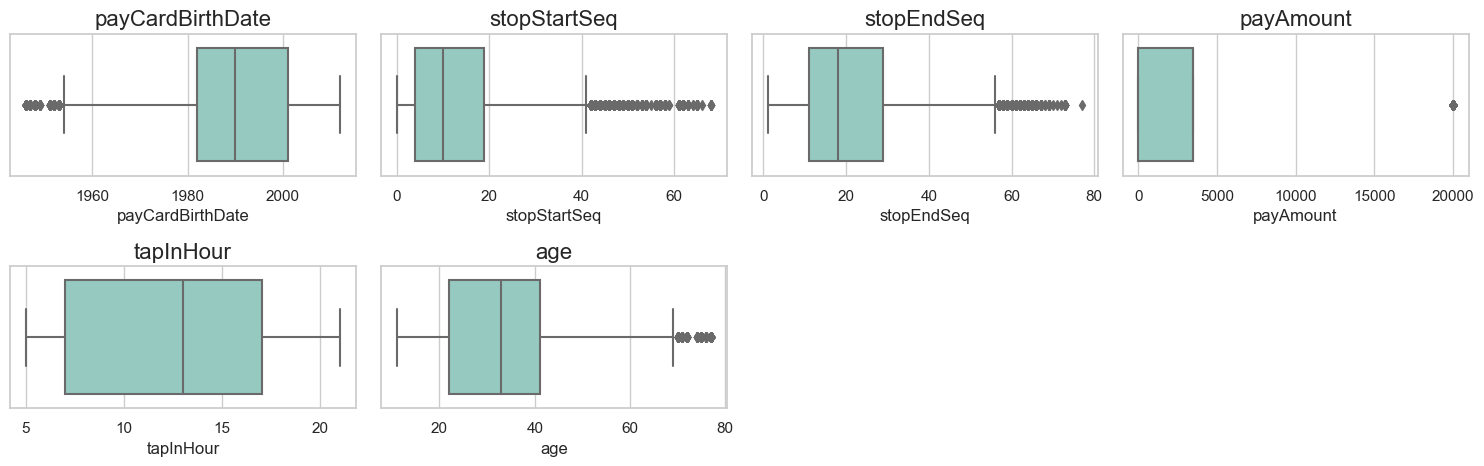

In [305]:
# Melihat sebaran data atau outliers
columnscheck = ['payCardBirthDate', 'stopStartSeq', 'stopEndSeq', 'payAmount', 'tapInHour', 'age']


plt.figure(figsize=(15,9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in columnscheck:
    ax = plt.subplot(4,4,plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, size=16)
    plt.tight_layout()
    plotnumber += 1

plt.show()


In [306]:
# Uji Normalitas
from scipy.stats import kstest

kolom_uji = ['payCardBirthDate', 'stopStartSeq', 'stopEndSeq', 'payAmount', 'tapInHour', 'age']

list = []

for i in kolom_uji : 
    ks,pvalue = kstest((df[i]), 'norm')
    if pvalue> 0.05:
        list.append([i,round(pvalue,2), ' berdistribusi normal'])
    else :
        list.append([i,round(pvalue,2), 'berdistribusi tidak normal'])

print('Jika p-value < 0,05 maka data berdistribusi tidak normal')
print('Jika p-value > 0,05 maka data berdistribusi normal')
print(f'\n')
print('Hasil Uji Normalitas')
pd.DataFrame(list, columns =[['Nama kolom','p-value','Distribusi']])

Jika p-value < 0,05 maka data berdistribusi tidak normal
Jika p-value > 0,05 maka data berdistribusi normal


Hasil Uji Normalitas


,Nama kolom,p-value,Distribusi
0,payCardBirthDate,0.0,berdistribusi tidak normal
1,stopStartSeq,0.0,berdistribusi tidak normal
2,stopEndSeq,0.0,berdistribusi tidak normal
3,payAmount,0.0,berdistribusi tidak normal
4,tapInHour,0.0,berdistribusi tidak normal
5,age,0.0,berdistribusi tidak normal


In [338]:
# Export data clean ke excel
df.to_csv('data_clean.csv')

In [ ]:
# correlation
df.corr(numeric_only=True)

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount,age,tapInHour
payCardID,1.000000,0.000530,-0.001322,-0.013236,-0.034179,-0.028345,-0.007686,-0.032163,-0.045689,0.061161,-0.000530,-0.002086
payCardBirthDate,0.000530,1.000000,0.001573,0.062093,-0.033124,-0.026207,0.039877,-0.032955,-0.028995,0.064863,-1.000000,-0.002533
direction,-0.001322,0.001573,1.000000,0.001968,-0.009190,-0.052201,-0.058180,0.045576,-0.044375,0.001093,-0.001573,0.105205
tapInStopsLat,-0.013236,0.062093,0.001968,1.000000,0.024514,-0.002578,0.899140,0.032977,-0.012320,-0.123102,-0.062093,-0.002901
tapInStopsLon,-0.034179,-0.033124,-0.009190,0.024514,1.000000,0.041999,0.035403,0.892410,0.080973,-0.190598,0.033124,0.006282
stopStartSeq,-0.028345,-0.026207,-0.052201,-0.002578,0.041999,1.000000,-0.017918,0.038016,0.825819,-0.250149,0.026207,-0.015886
tapOutStopsLat,-0.007686,0.039877,-0.058180,0.899140,0.035403,-0.017918,1.000000,0.015909,-0.025605,-0.141252,-0.039877,-0.001969
tapOutStopsLon,-0.032163,-0.032955,0.045576,0.032977,0.892410,0.038016,0.015909,1.000000,0.074422,-0.192227,0.032955,0.021457
stopEndSeq,-0.045689,-0.028995,-0.044375,-0.012320,0.080973,0.825819,-0.025605,0.074422,1.000000,-0.324038,0.028995,-0.000660
payAmount,0.061161,0.064863,0.001093,-0.123102,-0.190598,-0.250149,-0.141252,-0.192227,-0.324038,1.000000,-0.064863,0.009905


[]

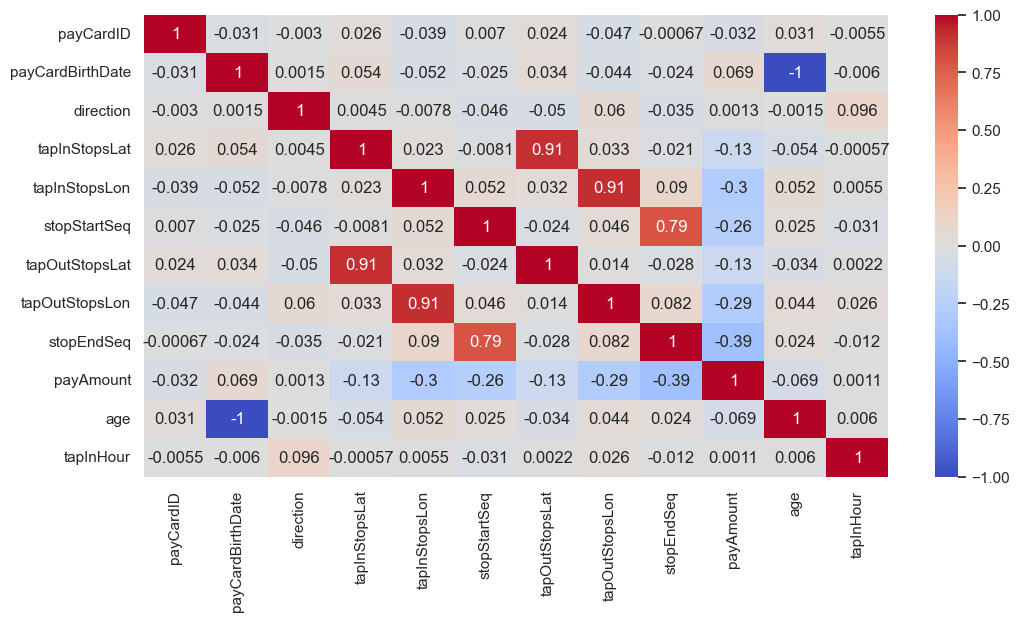

In [ ]:
# visualisasi heatmap
plt.figure(figsize=[12,6])
sns.heatmap(data = df.corr(numeric_only=True, method= 'spearman'),
            annot = True,
            cmap = 'coolwarm',
            center = 0)

plt.plot()

## **EDA**

**Distribusi Jenis Kelamin Pengguna**

Text(0.5, 1.0, 'Distribusi Jenis Kelamin Pengguna')

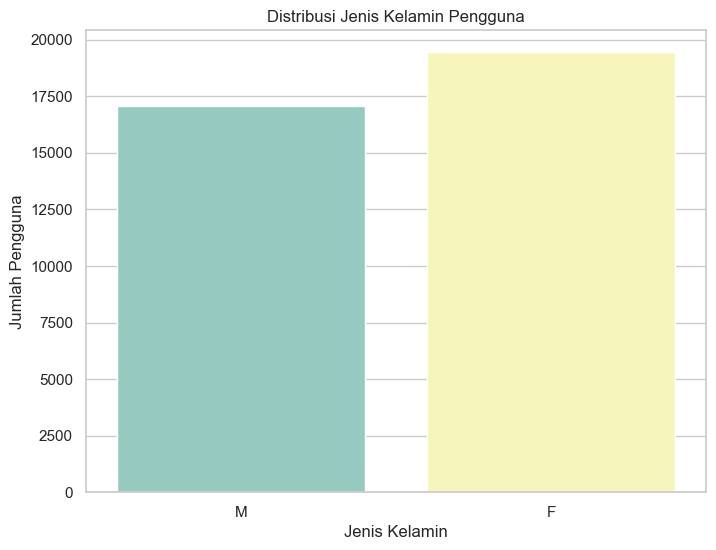

In [330]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='payCardSex')

plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Jenis Kelamin Pengguna')

**Jenis Transaksi**

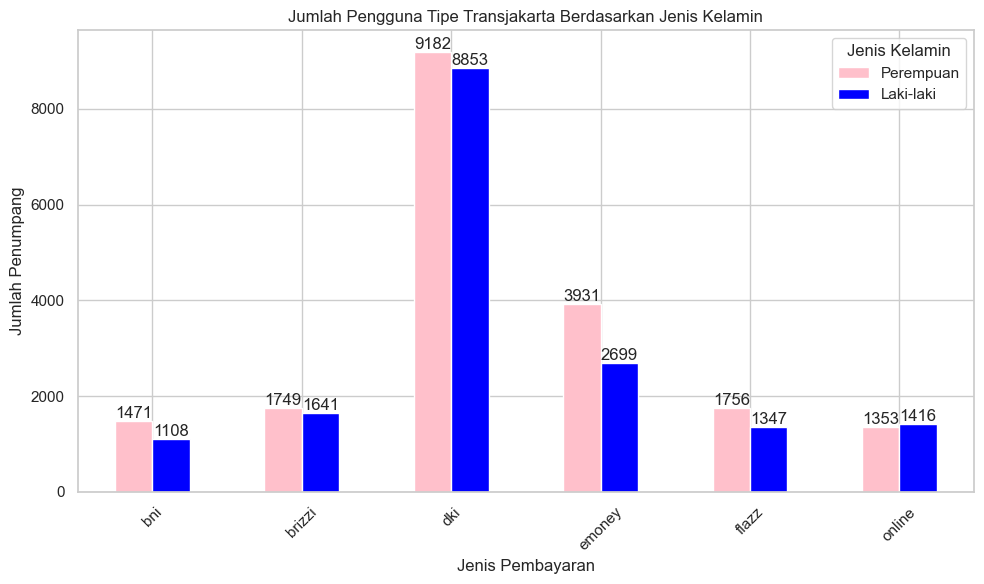

In [ ]:
# Hitung jumlah jenis kelamin penumpang dalam menggunakan jenis transaksi
passenger_counts = df.groupby(['payCardBank', 'payCardSex']).size().unstack(fill_value=0)

# Plot grafik
sns.set_style('whitegrid')
passenger_counts.plot(kind='bar', stacked=False, color=['pink', 'blue'], figsize=(10, 6))

# Menambahkan label di atas setiap bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Label dan judul
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Jumlah Penumpang')
plt.title('Jumlah Pengguna  Berdasarkan Jenis Kelamin')
plt.xticks(rotation=45)
plt.legend(title='Jenis Kelamin', labels=['Perempuan', 'Laki-laki'])

# Tampilkan grafik
plt.tight_layout()
plt.show()

**Distribusi Kartu Bank**

In [323]:
payments = df['payCardBank'].value_counts().reset_index()
payments.columns = ['payCardBank', 'count']
payments

,payCardBank,count
0,dki,18035
1,emoney,6630
2,brizzi,3390
3,flazz,3103
4,online,2769
5,bni,2579


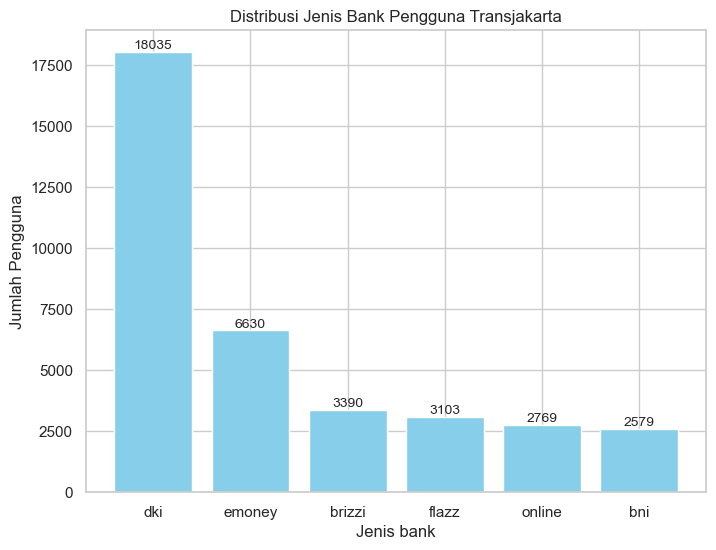

In [326]:
labels = payments['payCardBank']
values = payments['count']


plt.figure(figsize=(8, 6))
plt.bar(labels, values)
bars = plt.bar(labels, values, color='skyblue')
plt.xlabel('Jenis bank')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Jenis Bank Pengguna Transjakarta')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '%d' % int(height), ha='center', va='bottom', fontsize=10)


**Insight**

Berdasarkan grafik diatas Kebanyakan pegguna Tranjakarta adalah perempuan dan para pengguna paling banyak menggunakan  Bank DKI. Hal ini dikarenakan adanya kemungkinan kerjasama antara pihak bank dan pihak transjakarta.Pihak bank DKI kemungkinan menawarkan layanan perbankan khusus atau promosi kepada pengguna Transjakarta bisa berupa penawaran diskon atau insentif bagi pengguna kartu Transjakarta yang juga memiliki akun atau menggunakan layanan Bank DKI.

**Tipe Transjakarta**

In [331]:
transDistribution = df['transType'].value_counts().reset_index()
transDistribution

,transType,count
0,Regular Tj,18808
1,Mikrotrans,16011
2,Royal Trans,1687


Text(0.5, 1.0, 'Distribusi Pengguna Jenis Transjakarta')

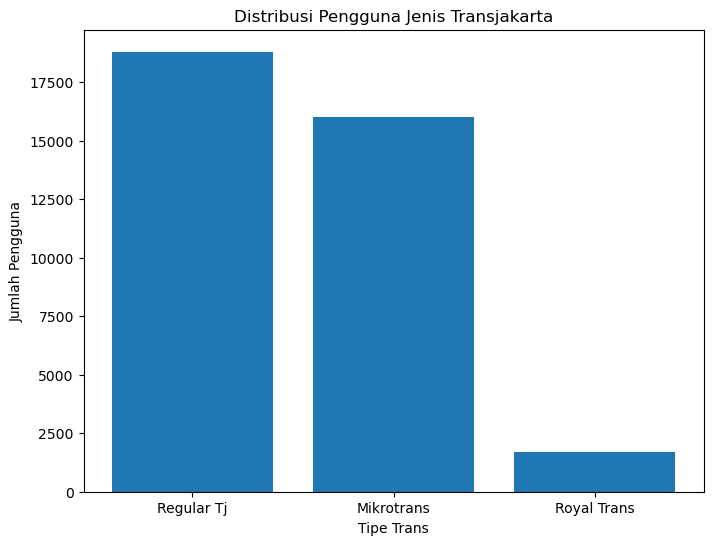

In [ ]:
labels = transDistribution['transType']
values = transDistribution['count']


plt.figure(figsize=(8, 6))
plt.bar(labels, values)

plt.xlabel('Tipe Trans')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Pengguna Jenis Transjakarta')

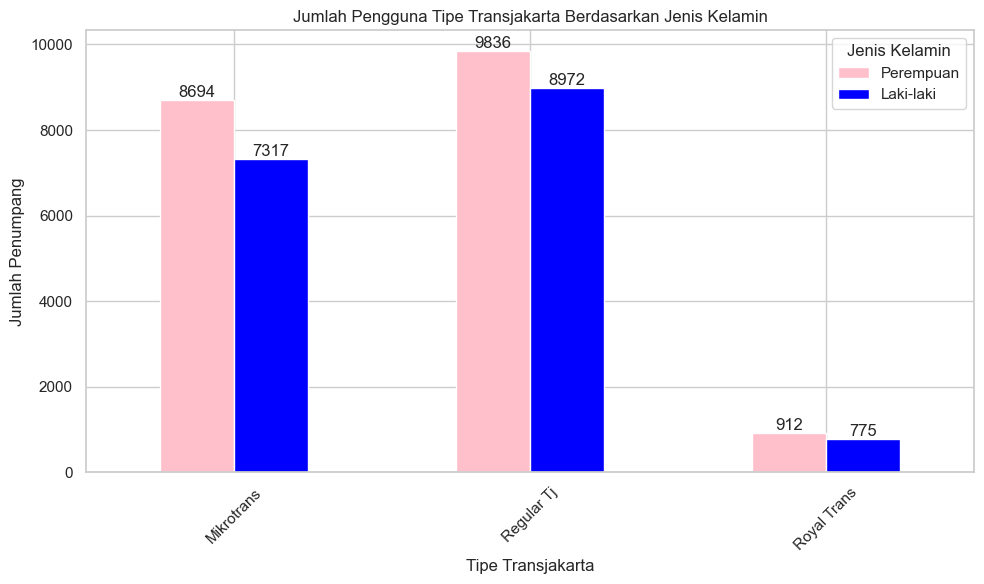

In [ ]:
# Hitung jumlah penumpang per jenis kelamin dan tipe Transjakarta
passenger_counts = df.groupby(['transType', 'payCardSex']).size().unstack(fill_value=0)

# Plot grafik
sns.set_style('whitegrid')
passenger_counts.plot(kind='bar', stacked=False, color=['pink', 'blue'], figsize=(10, 6))

# Menambahkan label di atas setiap bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

# Label dan judul
plt.xlabel('Tipe Transjakarta')
plt.ylabel('Jumlah Penumpang')
plt.title('Jumlah Pengguna Tipe Transjakarta Berdasarkan Jenis Kelamin')
plt.xticks(rotation=45)
plt.legend(title='Jenis Kelamin', labels=['Perempuan', 'Laki-laki'])

# Tampilkan grafik
plt.tight_layout()
plt.show()

**Insight**

Berdasarkan analisis data diatas dapat dilihat bahwa Perempuan banyak menggunakan tipe transjakarta regular yaitu sebanyak 9836. Kemungkinan hal ini disebkan perempuan lebih memilih tidak membawa kendaraaan  untuk menghindari kemacetan dan susah mencari parkir.

**Distribusi Kelompok Usia Pengguna**


In [ ]:
ageDistributition = df['ageGroup'].value_counts().reset_index()
ageDistributition

,ageGroup,count
0,31-40,11321
1,23-30,6561
2,41-50,5931
3,Under 18,5225
4,18-22,3926
5,51-60,2808
6,Elderly,734


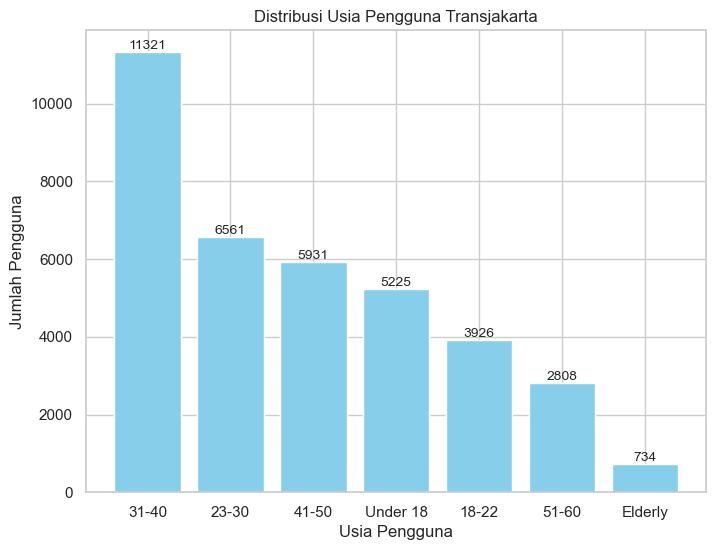

In [320]:
labels = ageDistributition['ageGroup']
values = ageDistributition['count']


plt.figure(figsize=(8, 6))
plt.bar(labels, values)
bars = plt.bar(labels, values, color='skyblue')
plt.xlabel('Usia Pengguna')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Usia Pengguna Transjakarta')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, '%d' % int(height), ha='center', va='bottom', fontsize=10)


**Insight**

Berdasarkan grafik diatas dapat diketahui bahwa kelompok umur 31-40 paling banyak melakukan perjalanan sebanyak 11321 kali dan Elderly atau lanjut usia yang paling dikit melakukan perjalanan hanya 734 Kali. Hal ini dikarenakan umur 31-40 merupakan umur produktif bekerja sehingga banyak menggunakan transportasi umum. 

**Koridor Terbanyak**

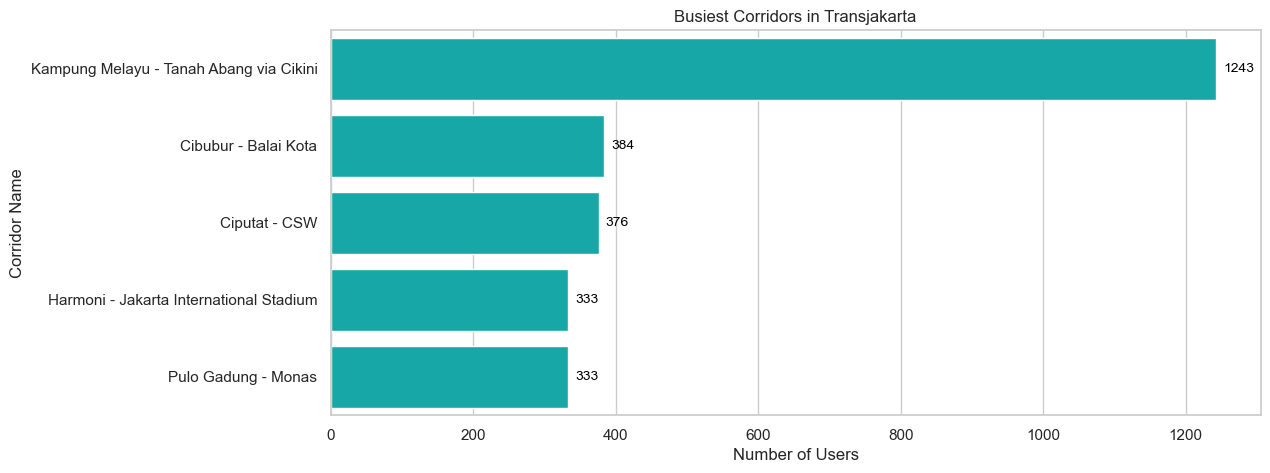

In [318]:
# analisis koridor dengan pengguna terbanyak
koridor_counts = df['corridorName'].value_counts().head(5)

plt.figure(figsize=(12, 5))
ax= sns.barplot(x=koridor_counts.values, y=koridor_counts.index, color="c")
plt.title('Busiest Corridors in Transjakarta')
plt.xlabel('Number of Users')
plt.ylabel('Corridor Name')

for i, count in enumerate(koridor_counts.values):
    ax.text(count + 10, i, str(count), ha='left', va='center', color='black', fontsize=10)

plt.show()

Dari grafik diatas, Kampung Melayu - Tanah Abang Via Cikini menjadi koridor yang paling banyak digunakan yaitu sebanyak 1243 kali

**Jam Kesibukan**

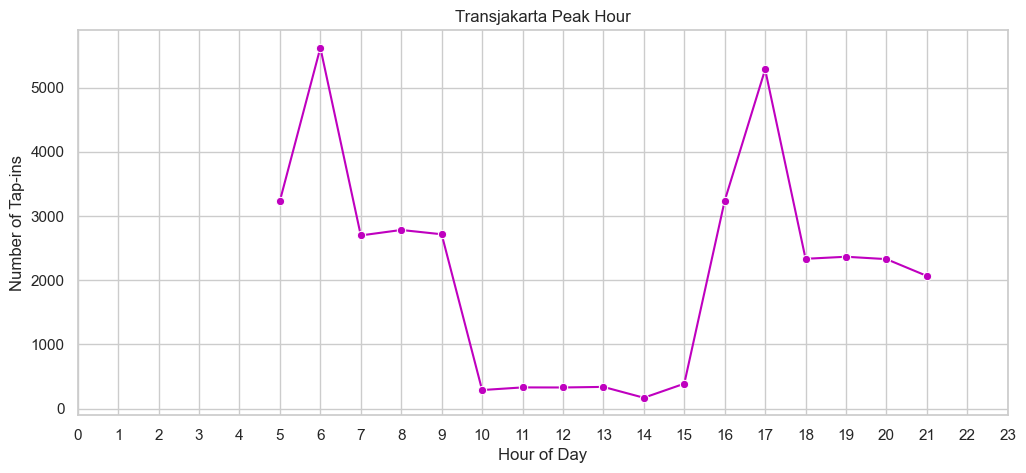

In [309]:
# analisis puncak jam kesibukan/peak hour transjakarta
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapInHour'] = df['tapInTime'].dt.hour
hourly_traffic = df['tapInHour'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=hourly_traffic.index, y=hourly_traffic.values, marker='o', color='m')
plt.title('Transjakarta Peak Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Tap-ins')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

Dari grafik diatas, peak hours atau puncak jam kesibukan terdapat di jam 5 sampai jam 6 di pagi hari dan jam 4 sampai jam 5 di sore hari.

In [317]:
# analisis koridor pada saat jam sibuk
df[(df['tapInHour'] == 6) | (df['tapInHour'] == 17)]['corridorName'].value_counts()

corridorName
Kampung Melayu - Tanah Abang via Cikini           360
Cibubur - Balai Kota                              126
Pasar Minggu - Tanah Abang                        119
Kebayoran Lama - Tanah Abang                      118
Pulo Gadung - Monas                               113
                                                 ... 
Gondangdia - Balai Kota                             5
Term. Pulo Gadung - Lampiri                         4
Grogol - Pos Pengumben via Slipi                    4
Tanah Abang - Kebayoran Lama via Pos Pengumben      4
Kampung Rambutan - Blok M                           2
Name: count, Length: 216, dtype: int64

**Insight**

Berdasarkan analisis diatas didapatkan  bahwa 360 penumpang yang menggunakan koridor Kampung Melayu - Tanah Abang via Cikini pada waktu jam sibuk yaitu jam 6 pagi dan jam 5 sore

In [321]:
# menghitung nilai total revenuw
sort_pendapatan = df.groupby('payCardBank')['payAmount'].sum().reset_index()

In [322]:
# mengurutkan pendapatan 
pendapatan_by_paycard = sort_pendapatan.sort_values(by='payAmount', ascending=False)
pendapatan_by_paycard

,payCardBank,payAmount
2,dki,44686000
3,emoney,20240000
1,brizzi,11939000
4,flazz,8926500
5,online,7118500
0,bni,6658000


Kesimpulan dan Rekomendasi
1. Kebanyakan pengguna Transjakarta adalah perempuan dan para pengguna paling banyak menggunakan Bank DKI. Untuk meningkatkan penggunaan bank lain direkomendasikan pihak PT. Transjakarta untuk bekerjasama lebih banyak sehingga dapat meningkatkan jumlah pengguna transjakarta. Banyaknya penumpang perempuan dalam menggunakan transjakarta, PT. Transjakarta direkomendasikan untuk menambahkan armada khusus untuk perempuan.

2. Pengguna Tranjakarta paling banyak berdasarkan umur yaitu di umur 31-40 yang merupakan usia produktif dalam bekerja. Banyaknya penumpang yang bekerja didalam kota mengakibatkan kemacetan yang meningkat di jam sibuk sehingga direkomendsikan pihak PT.Transjakarta untuk menambahkan jumlah armada transjakarta.